
Q1. Theory and Concepts:
1. Explain the concept of batch normalization in the context of Artificial Neural Networks.



1. Concept of Batch Normalization in Artificial Neural Networks (ANN):
Batch Normalization (BN) is a technique used in Artificial Neural Networks to improve the training speed, stability, and generalization of the model. It was introduced to address the internal covariate shift problem, which is the change in the distribution of the input values to a layer during training.
In a neural network, the input to each layer is affected by the weights and biases learned by the previous layers. As training progresses, the distribution of these inputs can shift, making it challenging for the subsequent layers to learn effectively. Batch normalization aims to mitigate this problem by normalizing the inputs of a layer.





**2. Describe the benefits of using batch normalization during training.**

2. Benefits of Using Batch Normalization During Training:


Accelerated Training: Batch normalization helps in reducing the number of training iterations required for convergence. This acceleration is achieved by maintaining a stable distribution of inputs throughout the network, enabling the use of higher learning rates.


Stability and Robustness: BN acts as a regularizer, reducing the sensitivity of the model to the choice of hyperparameters and the initialization of weights. This increased stability improves the robustness of the network.


Mitigating Vanishing/Exploding Gradients: Batch normalization helps alleviate the vanishing or exploding gradient problem by maintaining activations within a certain scale, which in turn facilitates more stable and efficient training.


Reduced Dependency on Initialization: BN reduces the dependence on careful weight initialization strategies, allowing for more flexibility in choosing initial weights.

**3.Discuss the working principle of batch normalization, including the normalization step and the learnable
parameters.**

Working Principle of Batch Normalization:

Batch normalization operates on a mini-batch of input data for each training iteration. The key steps in its working principle include:

Normalization Step: For each feature in the input, batch normalization normalizes the values to have a zero mean and unit variance. This is achieved by subtracting the mean and dividing by the standard deviation of the values in the mini-batch.

Scaling and Shifting: After normalization, the values are scaled and shifted using learnable parameters (gamma and beta). This introduces flexibility and allows the model to learn the optimal scale and shift for each feature.

Learnable Parameters: Gamma (γ) and Beta (β) are learnable parameters that are optimized during training. They allow the model to decide whether to scale and shift the normalized values, providing flexibility to the network.

By incorporating batch normalization into a neural network, the training process becomes more stable, and the model gains the ability to handle a variety of input distributions, leading to improved generalization performance.

**Q2. Impementation**

1. Choose a dataset of your choice (e.g., MNIST, CIFAR-IO) and preprocess it.

In [3]:
from keras.datasets import mnist


In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


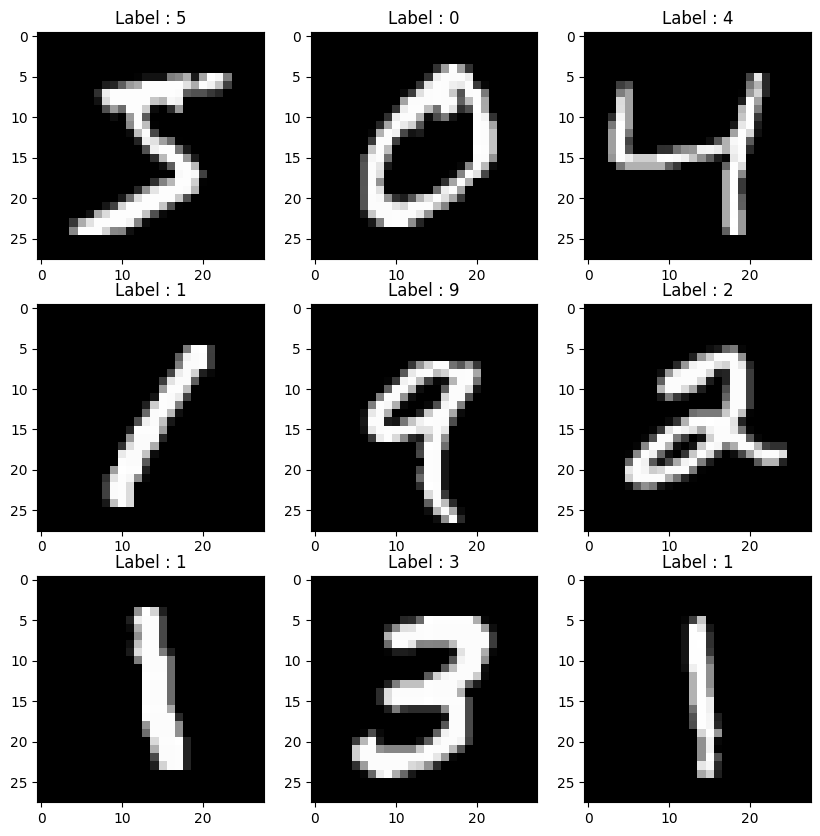

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i],cmap='gray')
    plt.title(f'Label : {y_train[i]}')
plt.show()

In [6]:
#Scaling the x features
x_train = x_train/255
x_test = x_test/255
#Converting Y features to categorical
from keras.utils import to_categorical
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
y_train[0:5]
y_test[0:5]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

2. Implement a simple feedforward neural network using any deep learning framework

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

In [8]:
# Define the model
model = Sequential()

# Adding a simple flatten layer
model.add(Flatten(input_shape=(28,28,1)))

# Adding Dense Layers
model.add(Dense(64, activation='relu'))
model.add(Dense(32,activation='relu'))

# Output layer
model.add(Dense(10,activation='softmax'))
# Compile the model
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
# Model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 52650 (205.66 KB)
Trainable params: 52650 (205.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


3. Train a neural network without using batch normalization during training

In [9]:
hist1 = model.fit(x_train,y_train,validation_split=0.2,epochs=25)

Epoch 1/25
1500/1500 [==============================] - 11s 4ms/step - loss: 0.3208 - accuracy: 0.9077 - val_loss: 0.1738 - val_accuracy: 0.9500
Epoch 2/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1448 - accuracy: 0.9560 - val_loss: 0.1351 - val_accuracy: 0.9609
Epoch 3/25
1500/1500 [==============================] - 10s 7ms/step - loss: 0.1060 - accuracy: 0.9678 - val_loss: 0.1334 - val_accuracy: 0.9627
Epoch 4/25
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0856 - accuracy: 0.9737 - val_loss: 0.1043 - val_accuracy: 0.9699
Epoch 5/25
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0696 - accuracy: 0.9790 - val_loss: 0.1146 - val_accuracy: 0.9667
Epoch 6/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0596 - accuracy: 0.9815 - val_loss: 0.0993 - val_accuracy: 0.9725
Epoch 7/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0498 - accuracy: 0.9842 - val_loss: 0.1105 - val_accura

In [10]:
model.evaluate(x_train,y_train)

1875/1875 [==============================] - 5s 2ms/step - loss: 0.0429 - accuracy: 0.9908


[0.04288976639509201, 0.9907833337783813]

In [11]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.1627 - accuracy: 0.9720


[0.16270248591899872, 0.972000002861023]

4. Implement batch normalization layers in neural network and train the model again

In [12]:
from keras.layers import BatchNormalization
model2 = Sequential()

# Flatten Layer
model2.add(Flatten(input_shape=(28,28,1)))

# Dense layers with batch normalization
model2.add(Dense(64,activation='relu'))
model2.add(BatchNormalization())
model2.add(Dense(32,activation='relu'))
model2.add(BatchNormalization())

# Output layer
model2.add(Dense(10,activation='softmax'))

In [13]:
#Compile the model
model2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
#Model2 summary
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                50240     
                                                                 
 batch_normalization (Batch  (None, 64)                256       
 Normalization)                                                  
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization_1 (Bat  (None, 32)                128       
 chNormalization)                                                
                                                                 
 dense_5 (Dense)             (None, 10)               

In [14]:
hist2 = model2.fit(x_train,y_train,validation_split=0.2,epochs=25)

Epoch 1/25
1500/1500 [==============================] - 9s 4ms/step - loss: 0.3363 - accuracy: 0.9032 - val_loss: 0.1587 - val_accuracy: 0.9542
Epoch 2/25
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1649 - accuracy: 0.9503 - val_loss: 0.1258 - val_accuracy: 0.9628
Epoch 3/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1268 - accuracy: 0.9615 - val_loss: 0.1150 - val_accuracy: 0.9653
Epoch 4/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1074 - accuracy: 0.9673 - val_loss: 0.1005 - val_accuracy: 0.9707
Epoch 5/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0893 - accuracy: 0.9720 - val_loss: 0.1044 - val_accuracy: 0.9686
Epoch 6/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0823 - accuracy: 0.9733 - val_loss: 0.1338 - val_accuracy: 0.9597
Epoch 7/25
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0746 - accuracy: 0.9761 - val_loss: 0.0900 - val_accuracy:

In [15]:
#Evaluate results in training and testing
model2.evaluate(x_train,y_train)

1875/1875 [==============================] - 5s 2ms/step - loss: 0.0269 - accuracy: 0.9931


[0.026905402541160583, 0.993149995803833]

In [16]:
model2.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0939 - accuracy: 0.9760


[0.09389558434486389, 0.9760000109672546]

5. Compare training and validation performance in between models with and without batch normalization

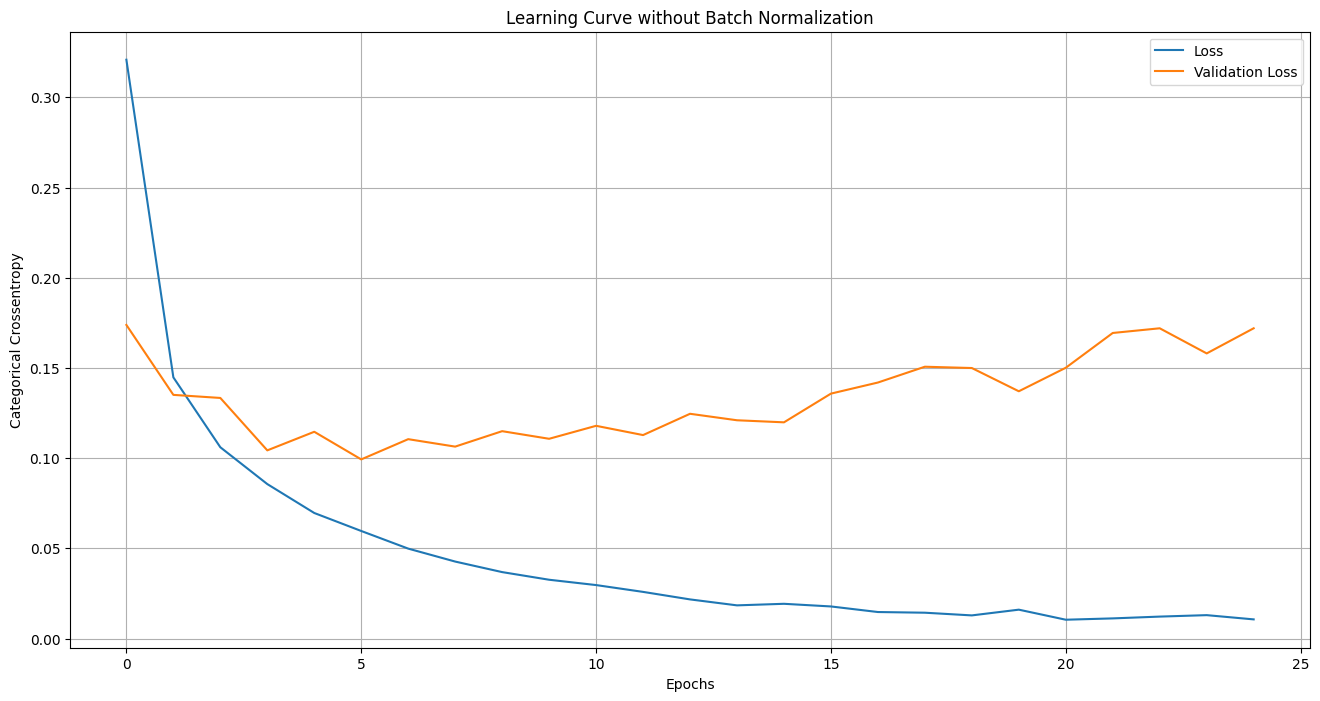

In [17]:
#Plotting the learning curve for model without batch normalization
plt.figure(figsize=(16,8))
plt.plot(hist1.history['loss'],label='Loss')
plt.plot(hist1.history['val_loss'],label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Categorical Crossentropy')
plt.title('Learning Curve without Batch Normalization')
plt.legend()
plt.grid()
plt.show()

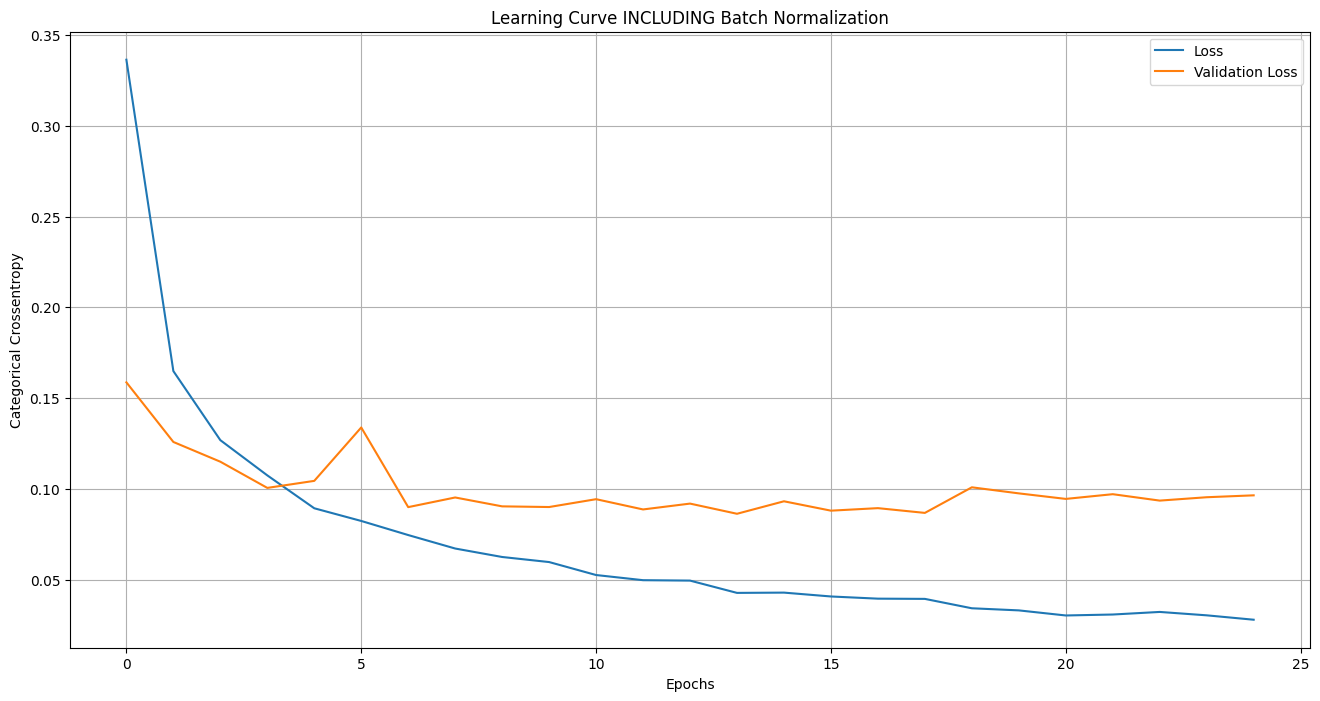

In [18]:
#Plotting the learning curve for Batch normalized model
plt.figure(figsize=(16,8))
plt.plot(hist2.history['loss'],label='Loss')
plt.plot(hist2.history['val_loss'],label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Categorical Crossentropy')
plt.title('Learning Curve INCLUDING Batch Normalization')
plt.legend()
plt.grid()
plt.show()

In [19]:
#Evaluation in train and test for model without Batch Normalization
model.evaluate(x_train,y_train)

1875/1875 [==============================] - 5s 3ms/step - loss: 0.0429 - accuracy: 0.9908


[0.04288976639509201, 0.9907833337783813]

In [20]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1627 - accuracy: 0.9720


[0.16270248591899872, 0.972000002861023]

In [21]:
#Evaluation of Data for model with Batch Normalization
model2.evaluate(x_train,y_train)

1875/1875 [==============================] - 4s 2ms/step - loss: 0.0269 - accuracy: 0.9931


[0.026905402541160583, 0.993149995803833]

In [22]:
model2.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0939 - accuracy: 0.9760


[0.09389558434486389, 0.9760000109672546]

6. Discuss the impact of batch normalization on training process and performance of neural network

**Below points were observed in above :
1.Reduced Overfitting : By Observing the Learning Curve it is clear that Batch 2.Normalization reduces the overfitting of data
3.Imporved Accuracy : Accuracy of Batch Normalization is better than model without batch normalization
4.Increased Training Time: Time required to train neural network with Batch Normalization increases**


In [23]:
#Plotting the confusion matrix for test data predicted with Batch normalization
yprob_test = model2.predict(x_test)
yprob_test[0:3]

313/313 [==============================] - 1s 2ms/step


array([[7.6138135e-06, 2.0671173e-06, 6.4843098e-06, 7.3303810e-05,
        1.4583999e-10, 2.5366095e-05, 1.2446466e-08, 9.9988067e-01,
        1.0537723e-08, 4.4003091e-06],
       [6.1988852e-05, 8.0480874e-08, 9.9993777e-01, 6.5589674e-08,
        3.1125968e-10, 1.1437028e-10, 1.3906444e-09, 1.8491779e-11,
        2.4923166e-11, 6.9710856e-12],
       [1.5987432e-11, 9.9999845e-01, 2.1221729e-10, 3.0701255e-10,
        2.7922653e-09, 1.4988163e-06, 2.1932967e-09, 1.2239335e-09,
        3.8572869e-12, 3.8621020e-12]], dtype=float32)

In [24]:
import numpy as np
ypred_test = np.argmax(yprob_test,axis=1)
ypred_test[0:3]

array([7, 2, 1])

In [25]:
y_test_label = np.argmax(y_test,axis=1)
y_test_label[0:3]

array([7, 2, 1])

In [26]:
lb = np.unique(y_test_label)
lb

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

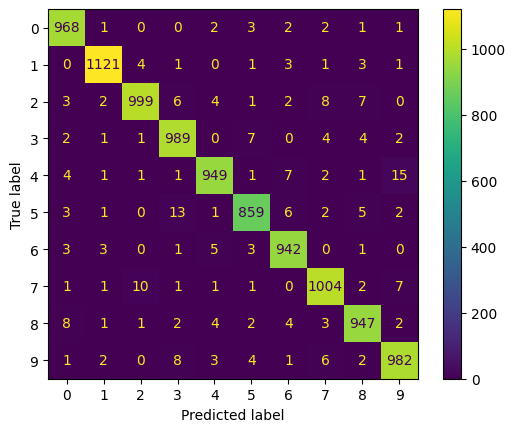

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(y_test_label,ypred_test)
cfd = ConfusionMatrixDisplay(cf,display_labels=lb)
cfd.plot()
plt.show()

In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test_label,ypred_test))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.97      0.98      0.97      1010
           4       0.98      0.97      0.97       982
           5       0.97      0.96      0.97       892
           6       0.97      0.98      0.98       958
           7       0.97      0.98      0.97      1028
           8       0.97      0.97      0.97       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



**Question 3 : Experimentation and Analysis**

1. Experiment with different batch sizes and observe the effect of training dynamics and model performance

In [29]:
def plot_learning_curve(hist, batch_size):
    plt.figure(figsize=(16,8))
    plt.plot(hist.history['loss'],label='Loss')
    plt.plot(hist.history['val_loss'],label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Categorical Crossentropy')
    plt.title(f'Learning curve with Batch Size = {batch_size}')
    plt.legend()
    plt.grid()
    plt.show()

In [31]:
sizes = [8,16,32,64,128,256,512,1024]
for i in sizes:
    print(f'Training for batch size = {i}')
    # Build Model
    nn = Sequential()
    nn.add(Flatten(input_shape=(28,28,1)))
    nn.add(Dense(64,activation='relu'))
    nn.add(BatchNormalization())
    nn.add(Dense(32,activation='relu'))
    nn.add(BatchNormalization())
    nn.add(Dense(10,activation='softmax'))
    # Compile model
    nn.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


Training for batch size = 8
Training for batch size = 16
Training for batch size = 32
Training for batch size = 64
Training for batch size = 128
Training for batch size = 256
Training for batch size = 512
Training for batch size = 1024


Conclusion : Batch size 16 found as most optimum for this model as test acuracy was highest of 97.68%

2. Discuss the advantage and potential limitations of batch Normalization in improving training of Neural Networks

**Advantages of Batch Normalization:**

1.  **Accelerated Training:**
    
    *   Batch Normalization (BN) helps in faster convergence during training by maintaining a stable distribution of inputs. This enables the use of higher learning rates, reducing the number of training iterations needed for convergence.
2.  **Stability and Robustness:**
    
    *   BN acts as a regularizer, reducing the sensitivity of the model to the choice of hyperparameters and the initialization of weights. This increased stability improves the robustness of the network and makes it less prone to overfitting.
3.  **Mitigation of Internal Covariate Shift:**
    
    *   BN addresses the issue of internal covariate shift by normalizing the inputs of each layer. This ensures that the distribution of inputs remains consistent throughout training, leading to more stable and efficient learning.
4.  **Reduced Dependency on Initialization:**
    
    *   With BN, the model becomes less dependent on careful weight initialization strategies. This allows for more flexibility in choosing initial weights, simplifying the training process.
5.  **Improved Generalization:**
    
    *   Batch normalization has been observed to act as a form of regularization, contributing to improved generalization performance. This is particularly beneficial when dealing with limited amounts of training data.
6.  **Effective Handling of Vanishing/Exploding Gradients:**
    
    *   BN helps mitigate the vanishing or exploding gradient problem by maintaining activations within a certain scale. This ensures that gradients propagated through the network during backpropagation are neither too small nor too large.

**Limitations and Considerations:**

1.  **Dependency on Batch Size:**
    
    *   The performance of BN can be sensitive to the batch size used during training. Extremely small batch sizes may result in inaccurate batch statistics, leading to suboptimal normalization.
2.  **Not Always Beneficial for Small Networks:**
    
    *   For very small networks or simple tasks, the overhead introduced by BN may outweigh its benefits. In such cases, it might be more effective to rely on simpler normalization techniques.
3.  **Incompatibility with Certain Architectures:**
    
    *   BN may not be easily applicable to certain network architectures, especially those where the concept of batches is not well-defined. For example, recurrent neural networks (RNNs) can present challenges in applying BN.
4.  **Increased Computational Overhead:**
    
    *   Although BN enhances training speed in many cases, it introduces additional computations during both training and inference, which could impact the overall computational efficiency.
5.  **Use of Dropout:**
    
    *   Batch normalization may interact with dropout regularization, and the simultaneous use of both techniques might require careful tuning of hyperparameters to achieve optimal performance.
6.  **Effectiveness on Small Datasets:**
    
    *   While BN is generally effective, its impact might be less pronounced on very small datasets where the normalization statistics are less reliable.

In summary, while Batch Normalization offers numerous advantages in improving training for neural networks, practitioners should carefully consider the specific characteristics of their datasets and model architectures. It is advisable to experiment and validate the performance of BN in the context of the specific problem at hand.